In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 2.1. Problem Statement: STATISTICS 1 

In [8]:
#1. You survey households in your area to find the average rent they are paying. Find the standard deviation from the following data: 
 # $1550, $1700, $900, $850, $1000, $950. 
    
a = np.array([ 850, 900, 950,1000,1550,1700])
a.std()

335.9274061791062

In [101]:
#2. Find the variance for the following set of data representing trees in California (heights in feet): 
 
# 3, 21, 98, 203, 17, 9

a = np.array([3, 21, 98, 203, 17, 9])

sd = a.std()
print("Standard Deviation:",sd)
print("Variance:",sd**2)


Standard Deviation: 71.99479147827293
Variance: 5183.250000000001


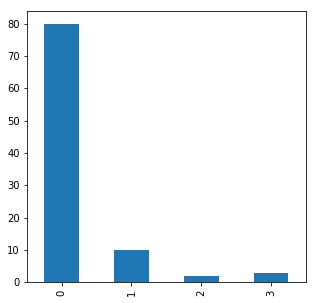

In [102]:
# 3. In a class of 100 students, 80 students passed in all subjects, 10 failed in one subject,
# 7 failed in two subjects and 3 failed in three subjects. 
#Find the probability distribution of the variable for number of subjects a student from the given class has failed in.
import pandas as pd
dict = {0:80, 1:10,7:2, 3:3}
df =  pd.DataFrame(dict.items(), columns=['Subjects_Failed', 'Students'])
df.Students.plot(kind="bar",figsize=(5,5))

# 2.2. Problem Statement: STATISTICS 2 

In [93]:
from scipy.stats import binom

In [2]:
#1. A test is conducted which is consisting of 20 MCQs (multiple choices questions) with every MCQ having '
#its four options out of which only one is correct. 
#Determine the probability that a person undertaking that test has answered exactly 5 questions wrong.

binom.pmf(5,20,0.75) *100

0.00034264958230778434

In [16]:
#2. A die marked A to E is rolled 50 times. Find the probability of getting a “D” exactly 5 times. 
binom.pmf(5,50,0.20)

0.029531204310523224

In [100]:
# 3. Two balls are drawn at random in succession without replacement from an urn containing 4 red balls and 6 black balls. 
# Find the probabilities of all the possible outcomes

print("Probablity of drawing both Red balls:",(4/10)*(3/9))
print("Probability of drawing Red and Black ball:",(4/10)*(6/9))
print("Probability of drawing Black and Red ball:",(6/10)*(4/9)) 
print("Probablity of drawing both Black balls:",(6/10)*(5/9))



Probablity of drawing both Red balls: 0.13333333333333333
Probability of drawing Red and Black ball: 0.26666666666666666
Probability of drawing Black and Red ball: 0.26666666666666666
Probablity of drawing both Black balls: 0.3333333333333333


# 2.3. Problem Statement: STATISTICS 3 

In [107]:
#Blood glucose levels for obese patients have a mean of 100 with a standard deviation of  15. 
#A researcher thinks that a diet high in raw cornstarch will have a positive effect on blood glucose levels. 
#A sample of 36 patients who have tried the raw cornstarch diet have a mean glucose level of 108. 
#Test the hypothesis that the raw cornstarch had an effect or not.

mean = 100
stdev = 15
xcritical = 108
n = 36
# Null Hypothesis H0: Mean = 100 i.e., no effect of corn starch on glucose levels
# Alternate Hypothesis H1: Mean != 100 , there is an effect of corn starch on glucose levels
alpha = 0.05
z_score = (xcritical-mean)/(stdev/np.sqrt(36))
z_critical_left = stat.norm.ppf(alpha/2) # Conducting a two tail test 
z_critical_right = -1*z_critical_left # since it is a normal distribution

print("Z Score:", z_score)
print("Z critical value on left :", z_critical_left)
print("Z critical value on right:" , z_critical_right )

if z_score > z_critical_right or z_score < z_critical_left:
    print("Reject Null Hypothesis i.e., there is an effect of corn starch ")
else:
    print("Fail to Reject Null Hypothesis i.e, no effect of corn starch")





Z Score: 3.2
Z critical value on left : -1.9599639845400545
Z critical value on right: 1.9599639845400545
Reject Null Hypothesis i.e., there is an effect of corn starch 


In [63]:
#1. In one state, 52% of the voters are Republicans, and 48% are Democrats. In a second state, 47% of the voters are 
#Republicans, and 53% are Democrats. Suppose a simple random sample of 100 voters are surveyed from each state. 
 
#What is the probability that the survey will show a greater percentage of Republican voters in the second state
#than in the first state? 

P1 = 0.52 # Population Proportion of state 1
P2 = 0.47 # Population Proportion of state 2
n1 = 100 # Sample Size of State 1
n2 = 100 #Sample Size of State 2
Mean = P1 - P2
stdev = np.sqrt(P1*(1-P1)/n1 + P2*(1-P2)/n2 )
Z_Score = (0 - Mean)/stdev
P_Value = stat.norm.cdf(Z_Score)
print("The probability that the survey will show a greater percentage of Republican voters in the second state:", P_Value)



The probability that the survey will show a greater percentage of Republican voters in the second state: 0.23946399182220013


In [66]:
#2. You take the SAT and score 1100. The mean score for the SAT is 1026 and the standard deviation is 209.
#How well did you score on the test compared to the average test taker? 

X = 1100
Mean = 1026
stdev = 209
Z = (X - Mean)/stdev
print("The score", X, "is", Z ,"Standard deviations from the mean" ,Mean)


The score 1100 is 0.35406698564593303 Standard deviations from the mean 1026


# 2.4. Problem Statement: STATISTICS 4 

In [4]:
#1. Is gender independent of education level? A random sample of 395 people were surveyed and each person was asked to report the highest education level they obtained. The data that resulted from the survey is summarized in the following table: 
 
#                High-School    Bachelor         Masters Ph.D.   Total 
#        Female      60         54                46     41       201      
#        Male        40         44                53     57       194 
#        Total       100        98                99     98       395  
#Question: Are gender and education level dependent at 5% level of significance? 
#In other words, given the data collected above, is there a relationship between the gender of an individual and the level of education that they have obtained? 

from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Null Hypothesis: H0 -> Gender Independent of Education Level
#Alternate Hypothesis: H1 -> Gender and Education level dependent at 5% level of significanceG# contingency table

table = [[60,54,46,41],
         [40,44,53,57]]

print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[60, 54, 46, 41], [40, 44, 53, 57]]
dof=3
[[50.88607595 49.86835443 50.37721519 49.86835443]
 [49.11392405 48.13164557 48.62278481 48.13164557]]
probability=0.950, critical=7.815, stat=8.006
Dependent (reject H0)
significance=0.050, p=0.046
Dependent (reject H0)


In [105]:
#2. Using the following data, perform a one-way analysis of variance using α=.05. Write up the results in APA format. 
 
#[Group1: 51, 45, 33, 45, 67]  [Group2: 23, 43, 23, 43, 45]  [Group3: 56, 76, 74, 87, 56] 

Group1 = np.array([51,45,33,45,67])
Group2 = np.array([23, 43, 23, 43, 45])
Group3 = np.array([56, 76, 74, 87, 56])

Sqdev1 = (Group1.mean() - Group1)**2
Sqdev2 = (Group2.mean() - Group2)**2
Sqdev3= (Group3.mean() - Group3)**2

Sum_Sqdev1 = Sqdev1.sum()
Sum_Sqdev2 = Sqdev2.sum()
Sum_Sqdev3 = Sqdev3.sum()

Var1 = Sum_Sqdev1/(len(Group1) -1)
Var2 = Sum_Sqdev2/(len(Group2) -1)
Var3 = Sum_Sqdev3/(len(Group3) -1)

MS_Within = (Var1 + Var2 + Var3)/3
Mean_Grand = (Group1.mean() + Group2.mean() + Group3.mean())/3
Mean_Grand
df = len(Group1) + len(Group1) + len(Group1) - 3
df
SS_Within = MS_Within * df
SS_Means = (Group1.mean() - Mean_Grand )**2 +  (Group2.mean() - Mean_Grand )**2 +  (Group3.mean() - Mean_Grand )**2
Var_Means = SS_Means/(3-1)
MS_Between = Var_Means * 5
df_groups = 3-1
SS_Between =  MS_Between * df_groups
F = MS_Between/MS_Within

F_Critical = stat.f.ppf(q=1-0.05, dfn=2, dfd=12)

Eta_Square = SS_Between + SS_Within

print("F absolute:", F)

if F > F_Critical:
    print("Reject Null Hypothesis i.e., atleast two of the means are significantly different from each other")
else:
    print("Fail to reject Null Hypothesis")
print("\nAPI Format")
print('-' * 10)
print("F(2,12) =", F , "p < 0.05","Eta-Squared:", Eta_Square )

# Using Scipy
stat.f_oneway(Group1,Group2,Group3)





F absolute: 9.747205503009457
Reject Null Hypothesis i.e., atleast two of the means are significantly different from each other

API Format
----------
F(2,12) = 9.747205503009457 p < 0.05 Eta-Squared: 4883.733333333333


F_onewayResult(statistic=9.747205503009463, pvalue=0.0030597541434430556)

In [41]:
#3. Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25. 

import statistics
a = np.array([10,20,30,40,50])
b = np.array([5,10,15,20,25])
a.mean()
Variance1 = statistics.stdev(a) **2
print(Variance1)
Variance2 = statistics.stdev(b)**2
print(Variance2)
F = Variance1/Variance2
print("F Test Value:",F)


250.0
62.0
F Test Value: 4.032258064516129
